# A smol example of Edge Detection on one of the image slices we have
You need to have the following file:
```./data/train/slice_1_img_168.npy```

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images

## Finding the global min and max values (not sure if we need this actually)

In [107]:
import os
from glob import glob

def get_img_file_names(start_dir):
    """Function for getting all .npy file names in a specific dir and all subdirs."""
    files = []
    pattern   = "*img_*.npy"

    for dir,_,_ in os.walk(start_dir):
        files.extend(glob(os.path.join(dir,pattern))) 
        
    return files

In [109]:
def load_arrays(filenames):
    """Function for loading numpy arrays from filenams."""
    return [np.load(filename) for filename in filenames]

In [129]:
def get_min_max(arrays, channel):
    """Function for finding the min and max of a specific channel for a list of numpy arrays."""
    mins = np.inf
    maxs = -np.inf
    for array in arrays:
        mins = min(mins, np.min(array[:,:,channel]))
        maxs = max(maxs, np.max(array[:,:,channel]))
        
    return mins, maxs

In [ ]:
filenames = get_img_file_names('data')
arrays = load_arrays(filenames)

## Plotting the label

In [201]:
label = np.load("./data/train/slice_1_mask_168.npy")

### Summing the first and second label dimensions (pure glacier, debris glacier)

In [202]:
label = np.sum(label[:,:,:2], axis=2)

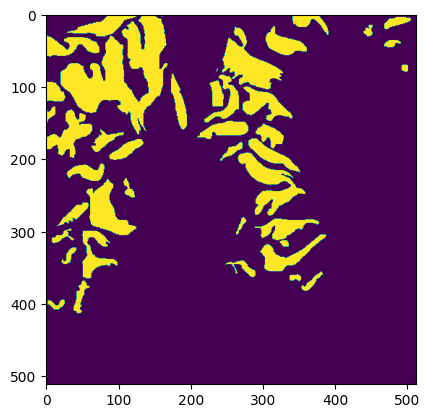

In [203]:
plt.imshow(label)

## Loading the image and normalising it [0, 1]

In [183]:
img = np.load("./data/train/slice_1_img_168.npy")
for i in range(3):
    #min_, max_ = get_min_max(arrays, i)
    min_ = np.min(img[:,:,i])
    max_ = np.max(img[:,:,i])
    img[:,:,i] = (img[:,:,i] - min_) / (max_ - min_)

## Creating a grayscale image

In [185]:
gray = cv2.cvtColor(img[:,:,:3], cv2.COLOR_BGR2GRAY)

## Getting edges

In [ ]:
edge_roberts = filters.roberts(gray)
edge_sobel = filters.sobel(gray)

## Plotting

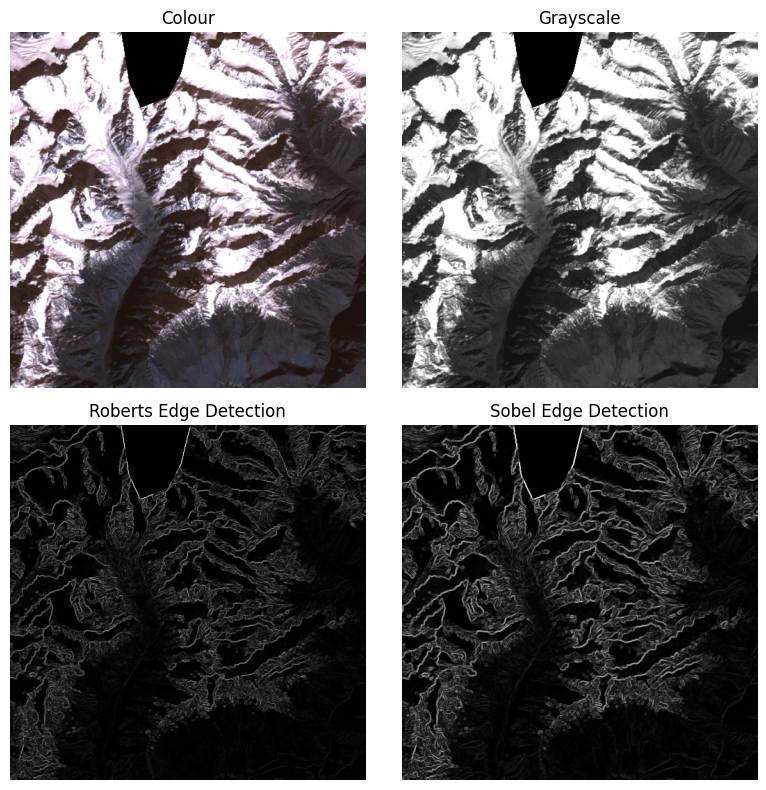

In [199]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True,
                         figsize=(8, 8))

axes[0][0].imshow(img[:,:,:3])
axes[0][0].set_title('Colour')

axes[0][1].imshow(gray, cmap=plt.cm.gray)
axes[0][1].set_title('Grayscale')

axes[1][0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[1][0].set_title('Roberts Edge Detection')

axes[1][1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1][1].set_title('Sobel Edge Detection')

# turn of the axes so that we just see the images without ticks
for row in axes:
    for col in row:
        col.axis('off')

plt.tight_layout()
plt.show()

## Histogram of Oriented Gradients
I just copied the example [here](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html). We might want to reduce the resolution of the image to speed up the process a bit? 

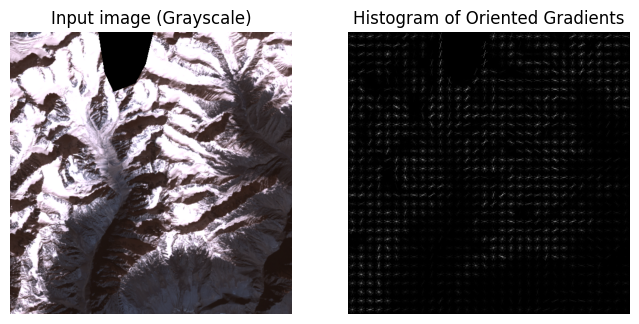

In [206]:
from skimage.feature import hog
from skimage import exposure

fd, hog_image = hog(img[:,:,:3], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img[:,:,:3], cmap=plt.cm.gray)
ax1.set_title('Input image (Grayscale)')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()